<a href="https://colab.research.google.com/github/ShruthiVidya-git/Stock-Market-Trend-Analysis/blob/main/Stock_Prediction_using_traditional_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas_datareader
# !pip install yfinance

In [ ]:
# !pip install skforecast

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf
from sklearn.model_selection import TimeSeriesSplit

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import tensorflow as tf
import keras
import requests

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from lightgbm import LGBMRegressor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


## Moving Average Model (Lag =[20, 250])

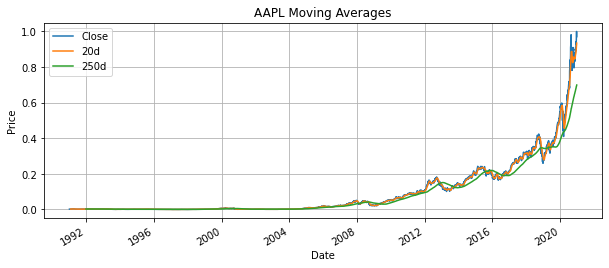

Testing Mean Squared Error for 20 day lag 0.0096
Testing Mean Squared Error for 250 day lag 0.0422




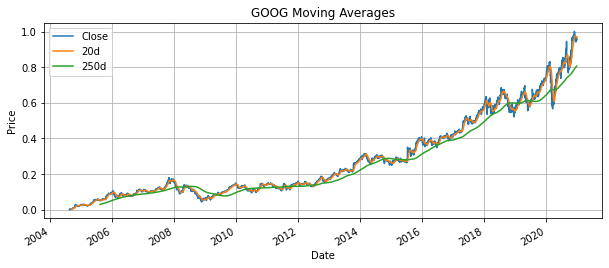

Testing Mean Squared Error for 20 day lag 0.0153
Testing Mean Squared Error for 250 day lag 0.0466




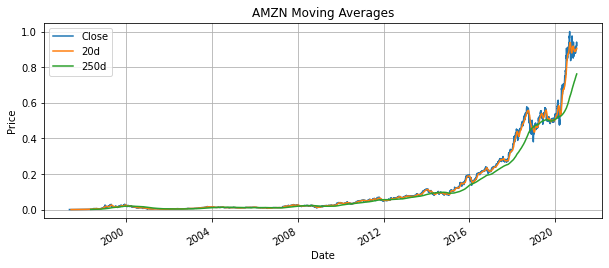

Testing Mean Squared Error for 20 day lag 0.0106
Testing Mean Squared Error for 250 day lag 0.048




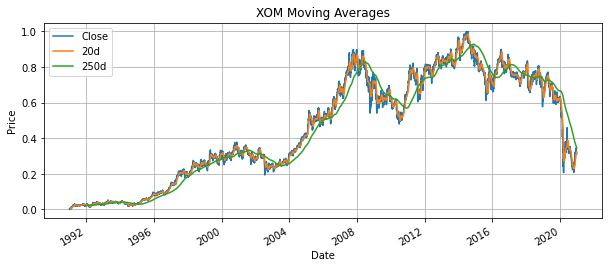

Testing Mean Squared Error for 20 day lag 0.0205
Testing Mean Squared Error for 250 day lag 0.0646




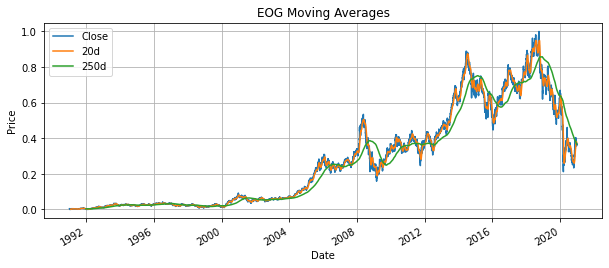

Testing Mean Squared Error for 20 day lag 0.0201
Testing Mean Squared Error for 250 day lag 0.0663




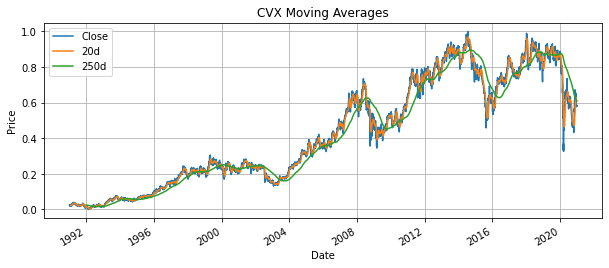

Testing Mean Squared Error for 20 day lag 0.0229
Testing Mean Squared Error for 250 day lag 0.0652




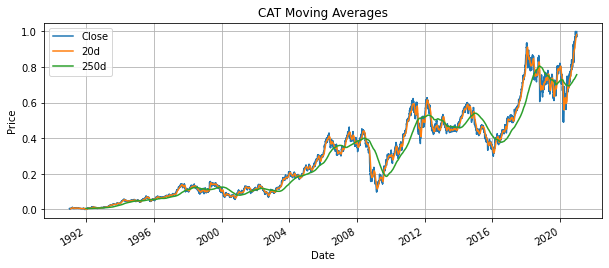

Testing Mean Squared Error for 20 day lag 0.0185
Testing Mean Squared Error for 250 day lag 0.0623




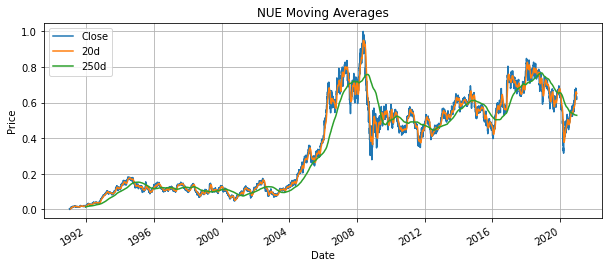

Testing Mean Squared Error for 20 day lag 0.0239
Testing Mean Squared Error for 250 day lag 0.0713




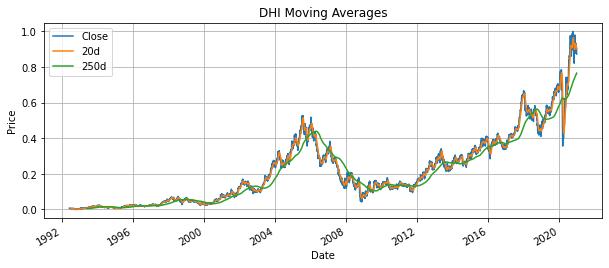

Testing Mean Squared Error for 20 day lag 0.0179
Testing Mean Squared Error for 250 day lag 0.056




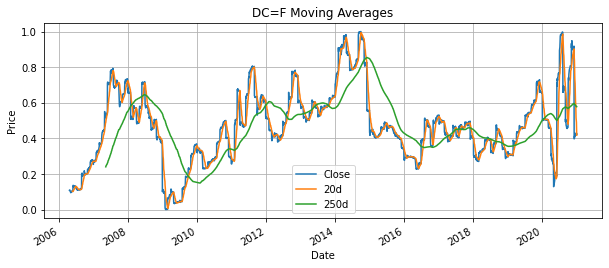

Testing Mean Squared Error for 20 day lag 0.0577
Testing Mean Squared Error for 250 day lag 0.1802




In [ ]:
''' Adapted from : (CodingFun), J. M. (2020, March 3). 
Moving average technical analysis with python. Medium.
 Retrieved May 11, 2022,
  from https://towardsdatascience.com/moving-average-technical-analysis-with-python-2e77633929cb 
'''

company = ['AAPL','GOOG','AMZN','XOM','EOG','CVX','CAT','NUE','DHI','DC=F']

start = dt.datetime(1991,1,1)
end = dt.datetime(2021,1,1)
data = []
for c in company :
  df = web.DataReader(c, 'yahoo', start, end)
  scaler = MinMaxScaler(feature_range=(0,1))
  # df = scaler.fit_transform(df) 
  df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']] = scaler.fit_transform(df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']])
  df['20d'] = df['Close'].rolling(20).mean()
  df['250d'] = df['Close'].rolling(250).mean()
  df[['Close','20d','250d']].plot(figsize=(10,4))
  plt.grid(True)
  plt.title(c + ' Moving Averages')
  plt.axis('tight')
  plt.ylabel('Price')
  plt.show()
  df['20d'] = df['20d'].fillna(0)
  df['250d'] = df['250d'].fillna(0)
  MSE_error1 = round(math.sqrt(mean_squared_error(df['Close'], df['20d'])),4)
  MSE_error2 = round(math.sqrt(mean_squared_error(df['Close'], df['250d'])),4)
  print('Testing Mean Squared Error for 20 day lag {}'.format(MSE_error1))
  print('Testing Mean Squared Error for 250 day lag {}'.format(MSE_error2))
  print()
  print()


## Random Walk Model

In [ ]:
''' Adapted from : Bitcoin price prediction with python.
 Bitcoin price prediction with Python and machine learning.(n.d.). Retrieved May 11, 2022, 
 from https://www.cienciadedatos.net/documentos/py41-forecasting-cryptocurrency-bitcoin-machine-learning-python.html 
'''

company = ['AAPL','GOOG','AMZN','XOM','EOG','CVX','CAT','NUE','DHI','DC=F']
company = 'AAPL'
start = dt.datetime(1991,1,1)
end = dt.datetime(2021,1,1)
data = []
for c in company :
  df = web.DataReader(c, 'yahoo', start, end)
  scaler = MinMaxScaler(feature_range=(0,1))
  df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']] = scaler.fit_transform(df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']])

In [ ]:
start_train = dt.datetime(2018,1,1)
end_train = dt.datetime(2020,1,1)

Test error: 0.027837982075653845


,Close,pred_close
Date,,
2020-01-02,0.935345,0.925849
2020-01-03,0.931304,0.935345
2020-01-06,0.917565,0.931304
2020-01-07,0.912716,0.917565


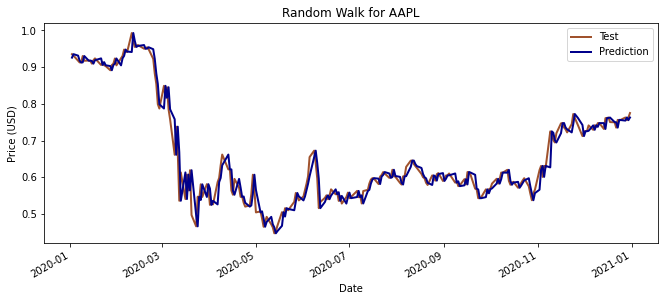

In [ ]:
df_rw = df[['Close']].copy()
df_rw['pred_close'] = df_rw['Close'].shift(1)

# Test error
# ==============================================================================
y_true = df_rw.loc[end_train:, 'Close']
y_pred = df_rw.loc[end_train:, 'pred_close']
metric = math.sqrt(mean_squared_error(y_true, y_pred))

print(f'Test error: {metric}')
display(df_rw.loc[end_train:,].head(4))

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 4.5))
df_rw.loc[end_train:, 'Close'].plot(ax=ax, linewidth=2, label='Test',
                                    c='sienna')
df_rw.loc[end_train:, 'pred_close'].plot(ax=ax, linewidth=2, label='Prediction',
                                    c='darkblue')
ax.set_title('Random Walk for ' + company )
ax.set_ylabel('Price (USD)')
ax.legend()

In [ ]:
df_errors = pd.DataFrame({'model': 'Base - Random Walk', 'lags': 1, 
                          'test_error': metric, 'exog_variables': False},
                         index=[0])
df_errors

,model,lags,test_error,exog_variables
0,Base - Random Walk,1,0.027838,False



## Recursive autoregressive forecaster

In [ ]:
''' Adapted from : Bitcoin price prediction with python.
 Bitcoin price prediction with Python and machine learning.(n.d.). Retrieved May 11, 2022, 
 from https://www.cienciadedatos.net/documentos/py41-forecasting-cryptocurrency-bitcoin-machine-learning-python.html 
'''

lags = [1, 7, 30]
metrics = []
predictions_list = []

for lag in lags:
    
    # Create forecaster
    forecaster = ForecasterAutoreg(
                    regressor = LGBMRegressor(random_state=123),
                    lags      = lag
                    )
    
    # Backtest test data, 1 step
    metric, predictions = backtesting_forecaster(
                                 forecaster = forecaster,
                                 y          = df.loc[start_train:, 'Close'],
                                 initial_train_size = len(df.loc[start_train:end_train, 'Close']),
                                 fixed_train_size   = True,
                                 steps      = 1,
                                 refit      = True,
                                 metric     = 'mean_squared_error',
                                 verbose    = False
                                 )
    
    metrics.append(metric)
    predictions_list.append(predictions)

Forecaster will be fit 253 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 



/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarnin

Forecaster will be fit 253 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 



/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarnin

Forecaster will be fit 253 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 



/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`y` has DatetimeIndex index but no frequency. '
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:247: UserWarnin

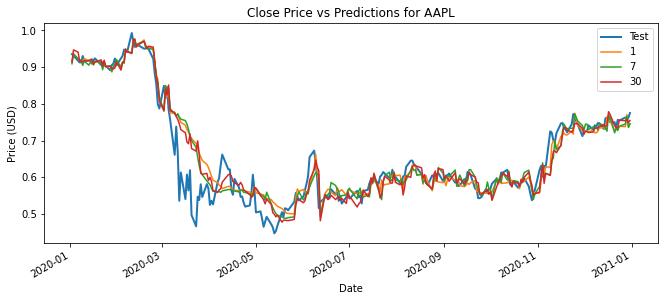

In [ ]:
fig, ax = plt.subplots(figsize=(11, 4.5))
df.loc[end_train:, 'Close'].plot(ax=ax, linewidth=2, label='Test')

for predictions, lag in zip(predictions_list, lags):
  predictions = predictions.rename(columns={'pred': f'Prediction, {lag} lags'})
  plt.plot(df.loc[end_train:].index, predictions,label = lag)


ax.set_title('Close Price vs Predictions for ' + company)
ax.set_ylabel('Price (USD)')
ax.legend();

## Autoregressive Integrated Moving Average Model


In [ ]:
'''Loukas, S. (2021, March 1). Time-series forecasting: Predicting stock prices using an Arima model. Medium.
 Retrieved May 11, 2022, 
 from https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70 
'''


def arima_model(df,c):
  train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
  training_data = train_data['Close'].values
  test_data = test_data['Close'].values 


  history = [x for x in training_data]
  model_predictions = []
  N_test_observations = len(test_data)
  for time_point in range(N_test_observations):
      model = ARIMA(history, order=(4,1,0))
      model_fit = model.fit(disp=0)
      output = model_fit.forecast()
      yhat = output[0]
      model_predictions.append(yhat)
      true_test_value = test_data[time_point]
      history.append(true_test_value)
  MSE_error = math.sqrt(mean_squared_error(test_data, model_predictions))
  print('Testing Root Mean Squared Error is {}'.format(MSE_error))

  test_set_range = df[int(len(df)*0.7):].index
  plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
  plt.plot(test_set_range, test_data, color='red', label='Actual Price')
  plt.title(c + " Prices Prediction")
  plt.xlabel('Date')
  plt.ylabel('Prices')
  #plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
  plt.legend()
  plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3

Testing Root Mean Squared Error is 0.007398161067819839


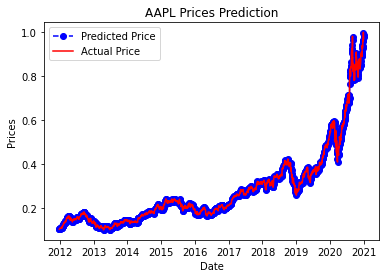

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


Testing Root Mean Squared Error is 0.011051174765387703


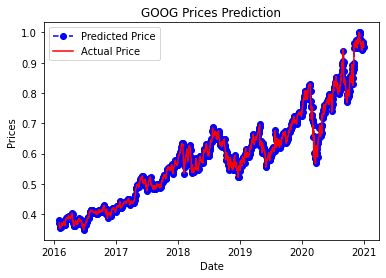

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3

Testing Root Mean Squared Error is 0.008592181789234064


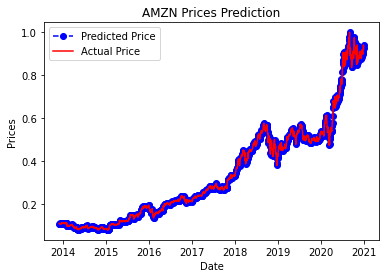

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3

Testing Root Mean Squared Error is 0.010891169963953555


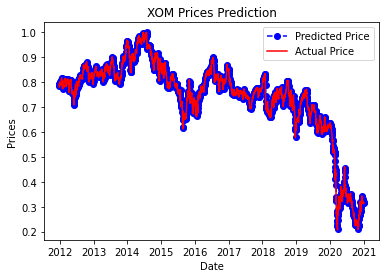

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3

Testing Root Mean Squared Error is 0.013162886880797062


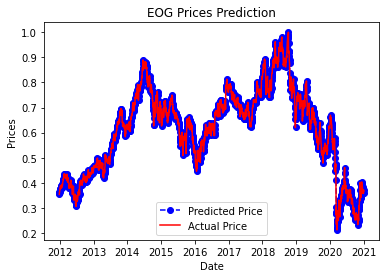

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3

Testing Root Mean Squared Error is 0.013645006563054509


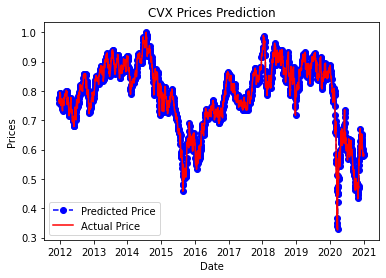

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3

Testing Root Mean Squared Error is 0.011300317614580505


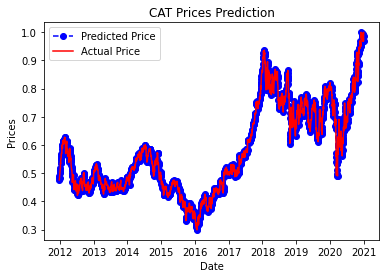

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3

Testing Root Mean Squared Error is 0.01125592607426445


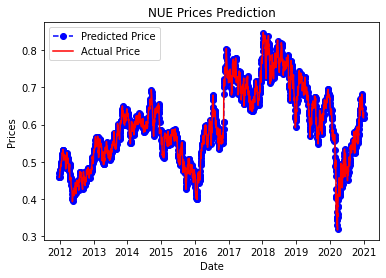

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3

Testing Root Mean Squared Error is 0.011001125412241923


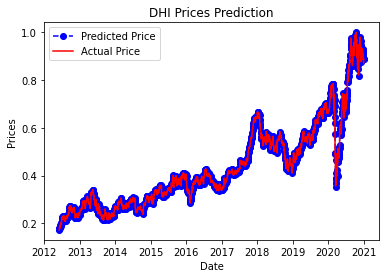

Testing Root Mean Squared Error is 0.02981910305210655


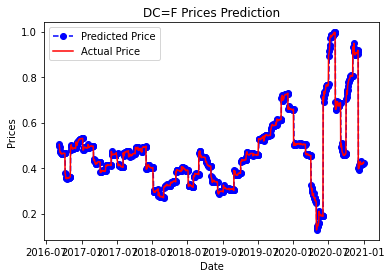

In [ ]:
company = ['AAPL','GOOG','AMZN','XOM','EOG','CVX','CAT','NUE','DHI','DC=F']
start = dt.datetime(1991,1,1)
end = dt.datetime(2021,1,1)
for c in company :
  df = web.DataReader(c, 'yahoo', start, end)
  scaler = MinMaxScaler(feature_range=(0,1))
  df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']] = scaler.fit_transform(df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']])
  arima_model(df,c)